In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "white",color_codes = True)

meltwater = pd.read_csv("NestMetric Training Data.csv")

meltwater.head()



Anonymous Company id    Geo  Account Churned?  (1=Yes, 0=No)  \
0                     1  Geo 1                                1   
1                     2  Geo 2                                0   
2                     3  Geo 1                                0   
3                     4  Geo 2                                0   
4                     5  Geo 2                                0   

   Year of Change  Month of Change  nbr of days since last account operation  \
0            2017                2                                      35.0   
1            2017                7                                       NaN   
2            2017                7                                       NaN   
3            2017                5                                       NaN   
4            2017                8                                       NaN   

   nbr of days since last document operation  docs opened on mobile  \
0                                        NaN                      0   
1                                       11.0                      0   
2                                        NaN                      0   
3                                        NaN                      0   
4                                       50.0                      0   

   docs opened in reports  docs opened on web  docs opened any source  \
0                       0                   0                       0   
1                      11                   0                      11   
2                       0                   0                       0   
3                       0                   0                       0   
4                      50                   0                      50   

   docs tagged on mobile  docs tagged on web  docs shared any source  \
0                      0                   0                       0   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   docs chg sentiment any source  docs hidden any source  mobile logins  \
0                              0                       0              0   
1                              0                       0              0   
2                              0                       0              0   
3                              0                       0              0   
4                              0                       0              0   

   web logins  mobile foreground  forgot password  
0          35                  0                0  
1           0                  0                0  
2           0                  0                0  
3           0                  0                0  
4           0                  0                0

In [2]:
churn = meltwater["Account Churned?  (1=Yes, 0=No)"]

In [3]:
meltwaterchurned = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 0]
meltwaternotchurned = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1]



In [4]:
meltwater.drop(['Anonymous Company id'], axis=1)

Geo  Account Churned?  (1=Yes, 0=No)  Year of Change  \
0        Geo 1                                1            2017   
1        Geo 2                                0            2017   
2        Geo 1                                0            2017   
3        Geo 2                                0            2017   
4        Geo 2                                0            2017   
5        Geo 1                                0            2017   
6        Geo 1                                0            2017   
7        Geo 1                                0            2017   
8        Geo 1                                1            2017   
9      Unknown                                0            2017   
10     Unknown                                0            2017   
11       Geo 2                                0            2017   
12       Geo 1                                1            2017   
13       Geo 3                                0            2017   
14       Geo 2                                0            2017   
15       Geo 1                                0            2017   
16       Geo 1                                0            2017   
17       Geo 1                                0            2017   
18       Geo 1                                0            2017   
19       Geo 1                                0            2017   
20       Geo 2                                0            2017   
21       Geo 2                                0            2017   
22       Geo 1                                0            2017   
23       Geo 1                                0            2017   
24       Geo 1                                0            2017   
25       Geo 1                                1            2017   
26       Geo 1                                0            2017   
27       Geo 1                                0            2017   
28       Geo 1                                0            2017   
29       Geo 1                                0            2017   
...        ...                              ...             ...   
12802    Geo 2                                0            2017   
12803    Geo 1                                1            2017   
12804    Geo 2                                0            2017   
12805    Geo 2                                0            2017   
12806    Geo 1                                1            2017   
12807    Geo 3                                1            2017   
12808    Geo 3                                0            2017   
12809    Geo 2                                0            2017   
12810    Geo 2                                0            2017   
12811    Geo 2                                0            2017   
12812    Geo 2                                0            2017   
12813    Geo 1                                1            2017   
12814  Unknown                                1            2017   
12815  Unknown                                1            2017   
12816    Geo 2                                0            2017   
12817    Geo 2                                0            2017   
12818    Geo 2                                0            2017   
12819    Geo 3                                1            2017   
12820    Geo 2                                0            2017   
12821    Geo 1                                0            2017   
12822    Geo 1                                0            2017   
12823    Geo 2                                0            2017   
12824    Geo 3                                1            2017   
12825    Geo 1                                1            2017   
12826    Geo 3                                0            2017   
12827    Geo 1                                1            2017   
12828    Geo 2                                0            2017   
12829    Geo 3                                1           

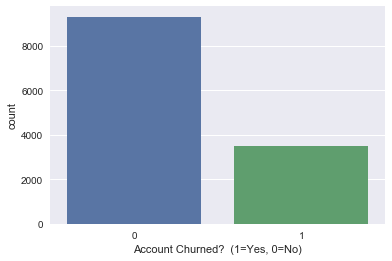

In [5]:
sns.set(style="darkgrid")
import seaborn as sns
ax = sns.countplot(x="Account Churned?  (1=Yes, 0=No)", data=meltwater)



In [16]:
no_churn = len(meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1])
non_churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 0].index

random_indices = np.random.choice(non_churn_indices,no_churn,replace =False)
churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1].index

under_sample_indices = np.concatenate([churn_indices,random_indices])
under_sample = meltwater.loc[under_sample_indices]

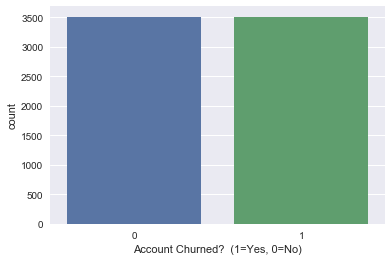

In [18]:
sns.countplot(x='Account Churned?  (1=Yes, 0=No)', data=under_sample)


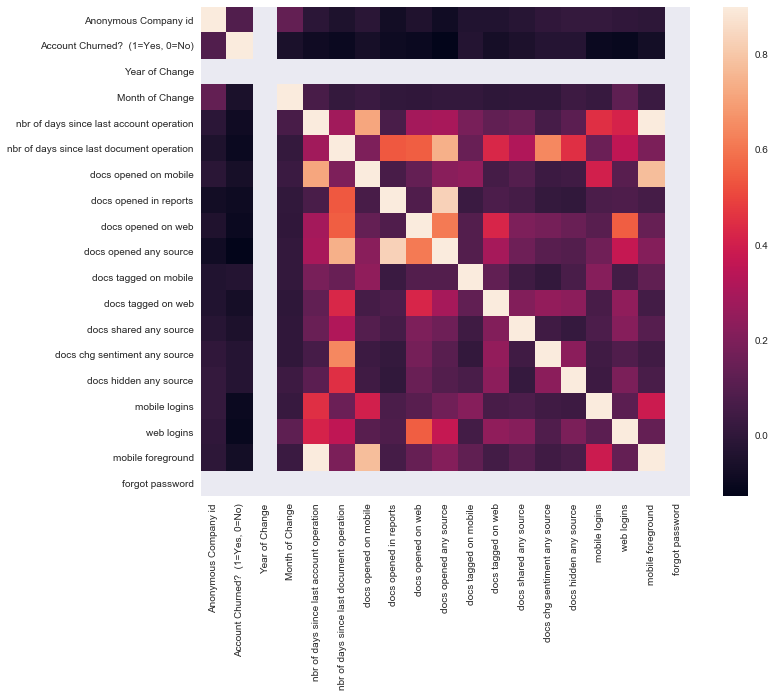

In [19]:
corrmat = under_sample.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

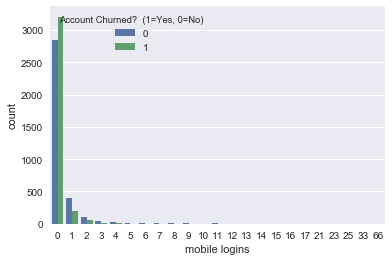

In [20]:
ax = sns.countplot(x= "mobile logins", hue="Account Churned?  (1=Yes, 0=No)", data=under_sample)

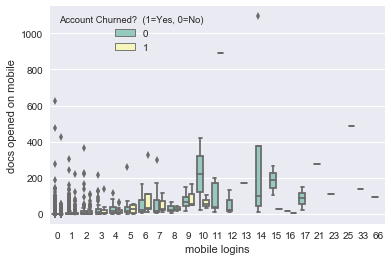

In [21]:
ax = sns.boxplot(x="mobile logins", y="docs opened on mobile", hue="Account Churned?  (1=Yes, 0=No)",data=under_sample, palette="Set3")

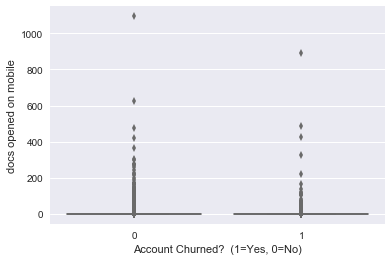

In [22]:
ax = sns.boxplot(x="Account Churned?  (1=Yes, 0=No)", y="docs opened on mobile",data=under_sample, palette="Set3")

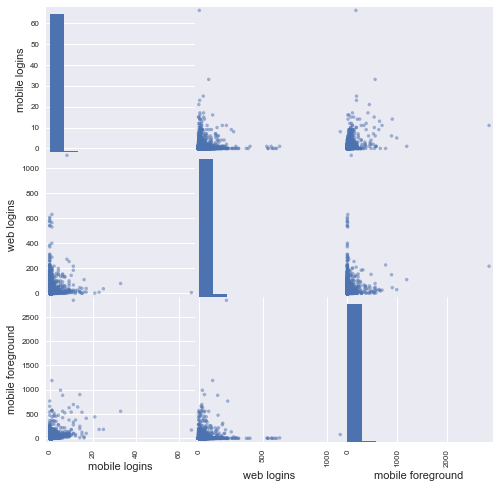

In [23]:
import pandas as pd
    
meltwater1 = pd.DataFrame(under_sample, columns=["mobile logins",
           "web logins",
           "mobile foreground",
      ])
pd.plotting.scatter_matrix(meltwater1, figsize=(8, 8));

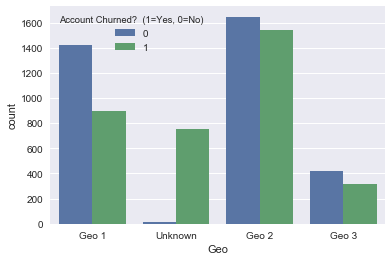

In [24]:
ax = sns.countplot(x="Geo", hue="Account Churned?  (1=Yes, 0=No)", data=under_sample)

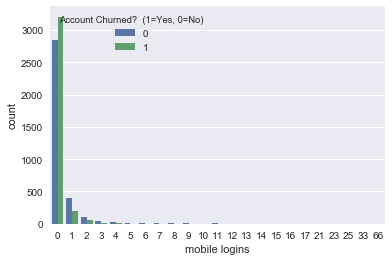

In [28]:
ax = sns.countplot(x= "mobile logins",hue="Account Churned?  (1=Yes, 0=No)", data=under_sample)

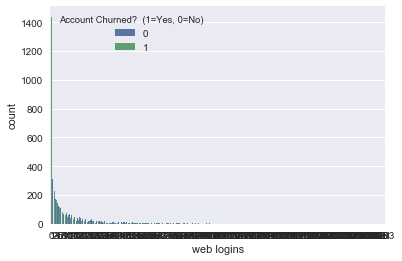

In [29]:
ax = sns.countplot(x= "web logins",hue="Account Churned?  (1=Yes, 0=No)", data=under_sample)